## Taking softmax is the same as taking sigmoid of the difference of Q values!

tensor(0.0013, dtype=torch.float64) tensor(0.9987, dtype=torch.float64)
tensor(0.0013, dtype=torch.float64) tensor(0.9987, dtype=torch.float64)
tensor(-4.4409e-16, dtype=torch.float64) tensor(4.4409e-16, dtype=torch.float64)


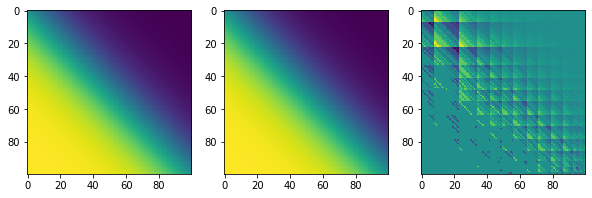

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

MIN_TEMP = 1.5

get_range = lambda: torch.tensor(np.linspace(-150, -50, 100))
a = get_range()
b = get_range()
a = a.view((a.numel(), 1)).expand((a.numel(), a.numel())).unsqueeze(2)
b = b.view((1, b.numel())).expand((b.numel(), b.numel())).unsqueeze(2)
#print(a)
#print(b)
grid = torch.cat((a, b), dim=2)
#temp = MIN_TEMP
temp = MIN_TEMP * 10
f = lambda x: (x / temp).softmax(dim=2)[:, :, 0]
g = lambda x: ((x[:, :, 0] - x[:, :, 1]) / temp).sigmoid()
h = lambda x: f(x) - g(x)
funcs = [f, g, h]
fig, axes = plt.subplots(1, len(funcs), figsize=(10, 7))
for func, ax in zip(funcs, axes):
    result = func(grid)
    ax.imshow(result)
    print(result.min(), result.max())

## Singular values of row matrices

In [5]:
import sympy

for n in range(1, 6):
    print(f"*** n = {n} ***")
    params = sympy.symbols([f"{chr(97 + i)}" for i in range(n)] + ["x"])
    m = sympy.Matrix([[params[i] for i in range(n)]])
    #print(m)
    m = m.T @ m
    #print(m)
    m = m - sympy.diag(*[params[-1]] * n)
    print("matrix:", m)
    det = m.det().simplify()
    print("determinant:", det)
    print("eigenvalues:", sympy.solve(det, params[-1]))

*** n = 1 ***
matrix: Matrix([[a**2 - x]])
determinant: a**2 - x
eigenvalues: [a**2]
*** n = 2 ***
matrix: Matrix([[a**2 - x, a*b], [a*b, b**2 - x]])
determinant: x*(-a**2 - b**2 + x)
eigenvalues: [0, a**2 + b**2]
*** n = 3 ***
matrix: Matrix([[a**2 - x, a*b, a*c], [a*b, b**2 - x, b*c], [a*c, b*c, c**2 - x]])
determinant: x**2*(a**2 + b**2 + c**2 - x)
eigenvalues: [0, a**2 + b**2 + c**2]
*** n = 4 ***
matrix: Matrix([[a**2 - x, a*b, a*c, a*d], [a*b, b**2 - x, b*c, b*d], [a*c, b*c, c**2 - x, c*d], [a*d, b*d, c*d, d**2 - x]])
determinant: x**3*(-a**2 - b**2 - c**2 - d**2 + x)
eigenvalues: [0, a**2 + b**2 + c**2 + d**2]
*** n = 5 ***
matrix: Matrix([[a**2 - x, a*b, a*c, a*d, a*e], [a*b, b**2 - x, b*c, b*d, b*e], [a*c, b*c, c**2 - x, c*d, c*e], [a*d, b*d, c*d, d**2 - x, d*e], [a*e, b*e, c*e, d*e, e**2 - x]])
determinant: x**4*(a**2 + b**2 + c**2 + d**2 + e**2 - x)
eigenvalues: [0, a**2 + b**2 + c**2 + d**2 + e**2]


## Singular values of two-row matrices

In [6]:
for n in range(1, 6):
    print(f"*** n = {n} ***")
    first_row = sympy.symbols([f"{chr(97 + i)}1" for i in range(n)])
    second_row = sympy.symbols([f"{chr(97 + i)}2" for i in range(n)])
    params = first_row + second_row + sympy.symbols(["x"])
    m = sympy.Matrix([first_row, second_row])
    #print(m)
    m = m.T @ m
    #print(m)
    m = m - sympy.diag(*[params[-1]] * n)
    print("matrix:", m)
    det = m.det().simplify()
    print("determinant:", det)
    print("eigenvalues:", sympy.solve(det, params[-1]))

*** n = 1 ***
matrix: Matrix([[a1**2 + a2**2 - x]])
determinant: a1**2 + a2**2 - x
eigenvalues: [a1**2 + a2**2]
*** n = 2 ***
matrix: Matrix([[a1**2 + a2**2 - x, a1*b1 + a2*b2], [a1*b1 + a2*b2, b1**2 + b2**2 - x]])
determinant: -(a1*b1 + a2*b2)**2 + (a1**2 + a2**2 - x)*(b1**2 + b2**2 - x)
eigenvalues: [a1**2/2 + a2**2/2 + b1**2/2 + b2**2/2 - sqrt((a1**2 - 2*a1*b2 + a2**2 + 2*a2*b1 + b1**2 + b2**2)*(a1**2 + 2*a1*b2 + a2**2 - 2*a2*b1 + b1**2 + b2**2))/2, a1**2/2 + a2**2/2 + b1**2/2 + b2**2/2 + sqrt((a1**2 - 2*a1*b2 + a2**2 + 2*a2*b1 + b1**2 + b2**2)*(a1**2 + 2*a1*b2 + a2**2 - 2*a2*b1 + b1**2 + b2**2))/2]
*** n = 3 ***
matrix: Matrix([[a1**2 + a2**2 - x, a1*b1 + a2*b2, a1*c1 + a2*c2], [a1*b1 + a2*b2, b1**2 + b2**2 - x, b1*c1 + b2*c2], [a1*c1 + a2*c2, b1*c1 + b2*c2, c1**2 + c2**2 - x]])
determinant: (a1*b1 + a2*b2)**2*(-c1**2 - c2**2 + x) + 2*(a1*b1 + a2*b2)*(a1*c1 + a2*c2)*(b1*c1 + b2*c2) + (a1*c1 + a2*c2)**2*(-b1**2 - b2**2 + x) + (b1*c1 + b2*c2)**2*(-a1**2 - a2**2 + x) + (a1**2 + a2**2 